In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
import sys

dir2 = os.path.abspath("")
dir1 = os.path.dirname(dir2)
if dir1 not in sys.path:
    sys.path.append(dir1)

os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fontsize = 16
n_bins = 10

x_ideal = np.linspace(0, 1, n_bins)

In [5]:
over_conf = x_ideal**2
under_conf = np.sqrt(x_ideal)

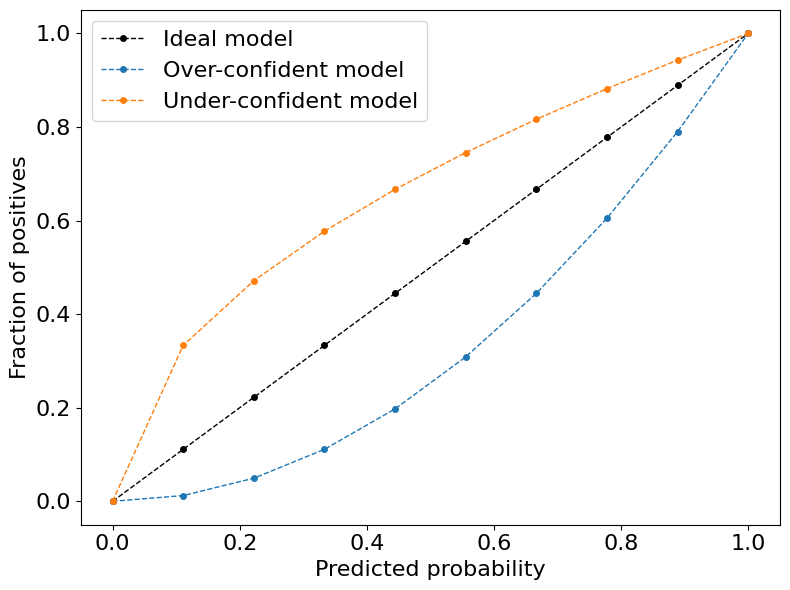

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(
    x_ideal,
    x_ideal,
    label="Ideal model",
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=1,
    c="black",
)

plt.plot(
    x_ideal,
    over_conf,
    label="Over-confident model",
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=1,
)

plt.plot(
    x_ideal,
    under_conf,
    label="Under-confident model",
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=1,
)

plt.plot()
plt.xlabel("Predicted probability", fontsize=fontsize)
plt.ylabel("Fraction of positives", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.savefig("pictures/calibration/curves/example_curve.pdf", dpi=300)
plt.show()

In [2]:
import numpy as np
import yaml
from src.datasets.datasets import CPDDatasets
from src.ensembles.ensembles import EnsembleCPDModel
from src.metrics.evaluation_pipelines import (
    all_distances_evaluation_pipeline,
    evaluation_pipeline,
)
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload
%matplotlib inline

comet_ml is installed but `COMET_API_KEY` is not set.


In [3]:
model_type = "tscp"

experiments_name = "yahoo"

path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, "r") as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type

# args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

train_dataset, test_dataset = CPDDatasets(experiments_name).get_dataset_()
test_dataloader = DataLoader(
    test_dataset, batch_size=args_config["learning"]["batch_size"], shuffle=False
)

In [4]:
path_to_models_folder = "saved_models/tscp/yahoo/window_75"

ens_tscp = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_tscp.load_models_list(path_to_models_folder)

In [5]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

metrics, (max_th_f1_margins_dict, max_f1_margins_dic), _, _ = evaluation_pipeline(
    ens_tscp,
    test_dataloader,
    threshold_list,
    device="cpu",
    model_type="ensemble",
    verbose=True,
    margin_list=[50, 100, 200],
)

  0%|          | 0/4 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 4/4 [02:02<00:00, 30.56s/it]


TN: 0, FP: 333, FN: 0, TP: 87, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7731123055089744
TN: 0, FP: 305, FN: 0, TP: 115, DELAY:1.0285714864730835, FP_DELAY:26.05476188659668, COVER: 0.7870532274883837
TN: 0, FP: 300, FN: 0, TP: 120, DELAY:1.3142857551574707, FP_DELAY:28.071428298950195, COVER: 0.7887876382094462
TN: 0, FP: 299, FN: 0, TP: 121, DELAY:1.3714286088943481, FP_DELAY:39.68095397949219, COVER: 0.7928574998632489
TN: 3, FP: 279, FN: 0, TP: 138, DELAY:1.8690476417541504, FP_DELAY:52.13809585571289, COVER: 0.8076953512663554
TN: 3, FP: 265, FN: 0, TP: 152, DELAY:2.116666555404663, FP_DELAY:61.50714111328125, COVER: 0.819886131409621
TN: 3, FP: 256, FN: 0, TP: 161, DELAY:2.509523868560791, FP_DELAY:64.44523620605469, COVER: 0.8233058362071887
TN: 3, FP: 254, FN: 0, TP: 163, DELAY:2.873809576034546, FP_DELAY:67.18333435058594, COVER: 0.8265146494571243
TN: 3, FP: 252, FN: 0, TP: 165, DELAY:3.549999952316284, FP_DELAY:69.53095245361328, COVER: 0.828508999091584
TN: 3, FP: 252, FN: 0, TP: 

In [6]:
res = all_distances_evaluation_pipeline(
    ens_tscp,
    test_dataloader,
    distance="wasserstein_1d",
    device="cpu",
    verbose=True,
    window_size_list=[50, 100, 200],
    margin_list=[50, 100, 200],
    anchor_window_type_list=["start", "prev"],
    threshold_list=np.linspace(0, 1, 50),
)

  0%|          | 0/4 [00:00<?, ?it/s]

Collectting model's outputs


  0%|          | 0/50 [00:00<?, ?it/s]

window_size = 50, anchor_window_type = start


  0%|          | 0/50 [00:00<?, ?it/s]

Results for best threshold = 0.12244897959183673
AUDC: 0.0, Time to FA: 342.9691, DD: 156.1857, F1: 0.9088, Cover: 0.8485, Max Cover: 0.8485
Max F1 with margin 50: 0.382
Max F1 with margin 100: 0.8163
Max F1 with margin 200: 0.8382
window_size = 50, anchor_window_type = prev


  0%|          | 0/50 [00:00<?, ?it/s]

Results for best threshold = 0.1020408163265306
AUDC: 0.0, Time to FA: 330.7405, DD: 137.0333, F1: 0.9259, Cover: 0.8611, Max Cover: 0.8611
Max F1 with margin 50: 0.4259
Max F1 with margin 100: 0.8489
Max F1 with margin 200: 0.878
window_size = 100, anchor_window_type = start


  0%|          | 0/50 [00:00<?, ?it/s]

Results for best threshold = 0.08163265306122448
AUDC: 0.0, Time to FA: 338.0929, DD: 167.1572, F1: 0.912, Cover: 0.8324, Max Cover: 0.8324
Max F1 with margin 50: 0.2667
Max F1 with margin 100: 0.6584
Max F1 with margin 200: 0.84
window_size = 100, anchor_window_type = prev


 46%|████▌     | 23/50 [34:27<40:25, 89.82s/it] 

In [5]:
res = all_distances_evaluation_pipeline(
    ens_tscp,
    test_dataloader,
    distance="wasserstein_1d",
    device="cpu",
    verbose=True,
    window_size_list=[200],
    margin_list=[50, 100, 200],
    anchor_window_type_list=["start", "prev"],
    threshold_list=np.linspace(0, 1, 50),
)

  0%|          | 0/4 [00:00<?, ?it/s]

Collectting model's outputs


  0%|          | 0/50 [00:00<?, ?it/s]

window_size = 200, anchor_window_type = start


  0%|          | 0/50 [00:00<?, ?it/s]

Results for best threshold = 0.02040816326530612
AUDC: 0.0, Time to FA: 237.4833, DD: 138.1262, F1: 0.9142, Cover: 0.7735, Max Cover: 0.7735
Max F1 with margin 50: 0.309
Max F1 with margin 100: 0.5889
Max F1 with margin 200: 0.6935
window_size = 200, anchor_window_type = prev


100%|██████████| 50/50 [2:04:15<00:00, 149.10s/it]  

Results for best threshold = 0.02040816326530612
AUDC: 0.0, Time to FA: 243.2238, DD: 139.7286, F1: 0.9123, Cover: 0.7747, Max Cover: 0.7747
Max F1 with margin 50: 0.2996
Max F1 with margin 100: 0.5884
Max F1 with margin 200: 0.6937


In [5]:
res = all_distances_evaluation_pipeline(
    ens_tscp,
    test_dataloader,
    distance="wasserstein_1d",
    device="cpu",
    verbose=True,
    window_size_list=[100],
    margin_list=[50, 100, 200],
    anchor_window_type_list=["prev"],
    threshold_list=np.linspace(0, 1, 50),
)

  0%|          | 0/4 [00:00<?, ?it/s]

Collectting model's outputs


  0%|          | 0/50 [00:00<?, ?it/s]

window_size = 100, anchor_window_type = prev


 76%|███████▌  | 38/50 [56:57<17:59, 89.93s/it] 